In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [21]:
def onehotencoding(Y):
    b = np.zeros((1, 10))
    b[0,Y] = 1
    return b

def create_minibatches(X,Y,minibatchsize):
    numbatches = int(np.ceil(len(X)/minibatchsize))
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X_minibatches = []
    Y_minibatches = [] 
    for i in range(numbatches):
        idx_minibatch = idx[i*minibatchsize:min(len(idx),(i+1)*minibatchsize)]
        xn = np.take(X,idx_minibatch,axis=0) 
        yn = np.take(Y,idx_minibatch,axis=0)
        X_minibatches.append(xn)
        Y_minibatches.append(yn)
    return X_minibatches, Y_minibatches

# NN class for SE loss

In [103]:
class Neural_Network():
    def __init__(self, neurons, Activations): 
        # arguments: an array "neurons" consist of number of neurons for each layer, 
        # an array "activations" consisting of activation functions used for the hidden layers and output layer
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] #weights for each layer
        self.biases = [] #biases in each layer 
        self.layer_activations = [] #activations in each layer
        for i in range(len(neurons)-1):
            if 1:
                self.weights.append(np.zeros((neurons[i+1],neurons[i]))) #weight matrix between layer i and layer i+1
                self.biases.append(np.zeros((neurons[i+1],1)))
                self.layer_activations.append(Activations[i]) #activations for each layer
            
            
    def sigmoid(self, z): # sigmoid activation function
        #Fill in the details to compute and return the sigmoid activation function                  
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z): # derivative of sigmoid activation function
        #Fill in the details to compute and return the derivative of sigmoid activation function
        return self.sigmoid(z)*(1-self.sigmoid(z))

                          
    def tanh(self, z): # hyperbolic tan activation function
        temp1 = np.exp(-z)
        temp2 = np.exp(z)
        return (temp2 - temp1)/(temp2 + temp1)
    
    def tanhPrime(self,x): # derivative of hyperbolic tan activation function
        return 1.0/(np.exp(x)+np.exp(-x))**2
                          
    def linear(self, z): # Linear activation function
        return z
    
    def linearPrime(self,x): # derivative of linear activation function
        return 1

    def ReLU(self,z): # ReLU activation function
        return np.maximum(z,0)
    
    def ReLUPrime(self,z): # derivative of ReLU activation function
        temp = np.maximum(z,0)
        return np.minimum(temp,1)
    
    def forward(self, a): # function of forward pass which will receive input and give the output of final layer
        # Write the forward pass using the weights and biases to find the predicted value and return them.
        layer_activations_a = [a] #store the input as the input layer activations
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            if self.layer_activations[i].lower()=='sigmoid':
                z = np.dot(w, a)+b
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                z = np.dot(w, a)+b
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='tanh':   
                z = np.dot(w, a)+b
                a = self.tanh(z)
            elif self.layer_activations[i].lower()=='linear':
                z = np.dot(w, a)+b
                a = self.linear(z)
            layer_dot_prod_z.append(z)    
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a
                          
            
    
    def backward(self, x, y, zs, activations): # find the loss and return derivative of loss w.r.t every parameter
        # Write the backpropagation algorithm here to find the gradients of weights and biases and return them.
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        
        # backward pass
        if self.layer_activations[-1].lower()=='sigmoid':
            delta = (activations[-1] - y) * \
                self.sigmoidPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='relu':
            delta = (activations[-1] - y) * \
                self.ReLUPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='tanh':   
            delta = (activations[-1] - y) * \
                self.tanhPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='linear':
            delta = (activations[-1] - y) * \
                self.linearPrime(zs[-1])

        # fill in the appropriate details for gradients of w and b
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)
                 
        for l in range(2, self.layers): # Here l is in backward sense i.e. last l th layer
            z = zs[-l]
            if self.layer_activations[-l].lower()=='sigmoid':
                prime = self.sigmoidPrime(z)
            elif self.layer_activations[-l].lower()=='relu':
                prime = self.ReLUPrime(z)
            elif self.layer_activations[-l].lower()=='tanh':   
                prime = self.tanhPrime(z)
            elif self.layer_activations[-l].lower()=='linear':
                prime = self.linearPrime(z)

            #Compute delta, gradients of b and w 
            delta = np.multiply(prime, np.dot(self.weights[-l+1].T, delta))
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l-1].T)
                          
        return (grad_b, grad_w)                 

    def update_parameters(self, grads, learning_rate): # update the parameters using the gradients
        # update weights and biases using the gradients and the learning rate
        
        grad_b, grad_w = np.array(grads[0]), np.array(grads[1])       
        
        #Implement the update rule for weights and biases
        self.weights = np.array(self.weights)
        self.biases = np.array(self.biases)
        self.weights = self.weights - learning_rate*grad_w
        self.biases = self.biases - learning_rate*grad_b
        self.weights = list(self.weights)
        self.biases = list(self.biases)
        
    def loss(self, predicted, actual):
        #Implement the loss function
        return 0.5*(predicted-actual)**2
    
    def CEloss(self, predicted, actual): # cross entropy loss
        return sum(np.multiply(actual, -1*np.log(predicted)))
    
    def S_SEloss(self, X_s1, Y_s1):
        losses = []
        for q in range(len(X_s1)):
            x = np.resize(X_s1[q],(X_s1[q].shape[0],1))
            y = np.resize(Y_s1[q],(1,1))
            out, dot_prod_z, activations_a = self.forward(x)
            loss = self.loss(out, y)
            losses.append(loss)
        return np.mean(losses)
                     
    def train(self, X_s1, Y_s1, X_s2, Y_s2, minibatch=False): # receive the full training data set
        lr = 1e-6        # learning rate
        epochs = 200     # number of epochs
        loss_list_1 = []
        loss_list_2 = []
        if minibatch==False:
            for e in range(epochs):
                losses = []
                for q in range(len(X)):
                    train_x = np.resize(X[q],(X[q].shape[0],1))
                    if not onehotencoded: 
                        train_y = np.resize(Y[q],(1,1))
                    else:
                        train_y = np.resize(np.argmax(Y[q]),(1,1))
                    out, dot_prod_z, activations_a = self.forward(train_x)
                    loss = self.loss(out, train_y)
                    grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                    self.update_parameters(grads, lr)
                    losses.append(loss)
                loss_list.append(np.mean(np.array(losses)))
                print(f'Epoch: {e} Loss: {np.mean(np.array(losses))}')
        else:
            minibatchsize = 50
            X_minibatches, Y_minibatches = create_minibatches(X_s1,Y_s1,minibatchsize)
            batch_number = 0 # choosing the batch number
            for e in range(epochs):
                losses = []
                grad_rage = (0,0)
                batch_number = 0
                for batch_number in range(len(X_minibatches)):
                    for q in range(len(X_minibatches[batch_number])):
                        train_x = np.resize(X_minibatches[batch_number][q],(X_minibatches[batch_number][q].shape[0],1))
                        if not onehotencoded: 
                            train_y = np.resize(Y_minibatches[batch_number][q],(1,1))
                        else:
                            train_y = np.resize(np.argmax(Y_minibatches[batch_number][q]),(1,1))
                        out, dot_prod_z, activations_a = self.forward(train_x)
                        grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                        grads = (np.array(grads[0]),np.array(grads[1]))
                        grad_rage = (grad_rage[0]+grads[0],grad_rage[1]+grads[1])
                    #loss = self.loss(out, train_y)
                    grad_rage = (grad_rage[0]/10,grad_rage[1]/10)
                    #grad_rage = (grad_rage[0]/len(X_minibatches[batch_number]),grad_rage[1]/len(X_minibatches[batch_number]))
                    self.update_parameters(grad_rage, lr)
                    #losses.append(loss)
                if e%5 == 0:
                    loss_list_1.append(self.S_SEloss(X_s1, Y_s1))
                    loss_list_2.append(self.S_SEloss(X_s2, Y_s2))
        return loss_list_1, loss_list_2
        
    def predict(self, x):
        print ("Input : \n" + str(x))
        prediction,_,_ = self.forward(x)
        print ("Output: \n" + str(prediction))


# NN class for CE loss

In [126]:
class Neural_Network_1():
    def __init__(self, neurons, Activations): 
        # arguments: an array "neurons" consist of number of neurons for each layer, 
        # an array "activations" consisting of activation functions used for the hidden layers and output layer
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] #weights for each layer
        self.biases = [] #biases in each layer 
        self.layer_activations = [] #activations in each layer
        for i in range(len(neurons)-1):
            self.weights.append(np.random.rand(neurons[i+1],neurons[i])) #weight matrix between layer i and layer i+1
            self.biases.append(np.random.rand(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) #activations for each layer
        
            
    def sigmoid(self, z): # sigmoid activation function
        #Fill in the details to compute and return the sigmoid activation function                  
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z): # derivative of sigmoid activation function
        #Fill in the details to compute and return the derivative of sigmoid activation function
        return self.sigmoid(z)*(1-self.sigmoid(z))

                          
    def tanh(self, z): # hyperbolic tan activation function
        temp1 = np.exp(-z)
        temp2 = np.exp(z)
        return (temp2 - temp1)/(temp2 + temp1)
    
    def tanhPrime(self,x): # derivative of hyperbolic tan activation function
        return 4.0/((np.exp(x)+np.exp(-x))**2)
                          
    def linear(self, z): # Linear activation function
        return z
    
    def linearPrime(self,x): # derivative of linear activation function
        return np.ones(x.shape)

    def ReLU(self,z): # ReLU activation function
        return np.maximum(z,0)
    
    def ReLUPrime(self,z): # derivative of ReLU activation function
        temp = np.maximum(z,0)
        return np.minimum(temp,1)
    
    def forward(self, a): # function of forward pass which will receive input and give the output of final layer
        # Write the forward pass using the weights and biases to find the predicted value and return them.
        layer_activations_a = [a] #store the input as the input layer activations
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            if self.layer_activations[i].lower()=='sigmoid':
                z = np.dot(w, a)+b
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                z = np.dot(w, a)+b
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='tanh':   
                z = np.dot(w, a)+b
                a = self.tanh(z)
            elif self.layer_activations[i].lower()=='linear':
                z = np.dot(w, a)+b
                a = self.linear(z)
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        #print(a.shape, 'a has a shape')
        a = np.exp(a)
        a = a/np.sum(a) + 1e-10 # this is taking softmax of last layer activations
        layer_activations_a.pop()
        layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a
                          
    
    def backward(self, x, y, zs, activations): # find the loss and return derivative of loss w.r.t every parameter
        # Write the backpropagation algorithm here to find the gradients of weights and biases and return them.
        grad_b = [np.ones(b.shape) for b in self.biases]
        grad_w = [np.ones(w.shape) for w in self.weights]
        #print(activations[-1], 'Ã¡dfhgghgfghvcsyhhokkokjihfhreoijouey3ifhuirh4uit4uh34u')
        # backward pass
        if self.layer_activations[-1].lower()=='sigmoid':
            
            delta = (activations[-1] - y) * \
                self.sigmoidPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='relu':
            delta = (activations[-1] - y) * \
                self.ReLUPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='tanh':   
            delta = (activations[-1] - y) * \
                self.tanhPrime(zs[-1])
        elif self.layer_activations[-1].lower()=='linear':
            delta = activations[-1] - y.T #derivative of softmax
            #delta = -1*delta
            
                

        # fill in the appropriate details for gradients of w and b
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)
                 
        for l in range(2, self.layers): # Here l is in backward sense i.e. last l th layer
            z = zs[-l]
            if self.layer_activations[-l].lower()=='sigmoid':
                prime = self.sigmoidPrime(z)
                #print('here at prime vro', prime, 'adios')
            elif self.layer_activations[-l].lower()=='relu':
                prime = self.ReLUPrime(z)
                #print('here at prime vro', prime, 'adios')
            elif self.layer_activations[-l].lower()=='tanh':   
                prime = self.tanhPrime(z)
            elif self.layer_activations[-l].lower()=='linear':
                prime = self.linearPrime(z)

            #Compute delta, gradients of b and w 
            delta = np.multiply(prime, np.dot(self.weights[-l+1].T, delta))
            #print('here at prime vro', delta, 'adios')
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l-1].T)
                          
        return (grad_b, grad_w)                 

    def update_parameters(self, grads, learning_rate): # update the parameters using the gradients
        # update weights and biases using the gradients and the learning rate
        
        grad_b, grad_w = np.array(grads[0]), np.array(grads[1])       
        
        #Implement the update rule for weights and biases
        self.weights = np.array(self.weights)
        self.biases = np.array(self.biases)
        self.weights = self.weights - learning_rate*grad_w
        self.biases = self.biases - learning_rate*grad_b
        self.weights = list(self.weights)
        self.biases = list(self.biases)
        
    def loss(self, predicted, actual):
        #Implement the loss function
        return 0.5*(predicted-actual)**2
    
    def CEloss(self, predicted, actual): # cross entropy loss
        
        #print('predicted:-',predicted)
        
        predicted = predicted
        return sum(np.multiply(actual, (-1)*np.log(predicted)))
    
    def S_CEloss(self, X_s1, Y_s1):
        losses = []
        for q in range(len(X_s1)):
            x = np.resize(X_s1[q],(X_s1[q].shape[0],1))
            y = np.resize(Y_s1[q],(1,1))
            out, dot_prod_z, activations_a = self.forward(x)
            loss = self.CEloss(out, onehotencoding(y))
            losses.append(loss)
        return np.mean(losses)
                     
    def train(self, X_s1, Y_s1, X_s2, Y_s2, minibatch=False): # receive the full training data set
        lr = (1e-6)        # learning rate
        epochs = 200    # number of epochs
        loss_list_1 = []
        loss_list_2 = []
        if minibatch==False:
            for e in range(epochs):
                losses = []
                for q in range(len(X)):
                    train_x = np.resize(X[q],(X[q].shape[0],1))
                    if not onehotencoded: 
                        train_y = np.resize(Y[q],(1,1))
                    else:
                        train_y = np.resize(np.argmax(Y[q]),(1,1))
                    out, dot_prod_z, activations_a = self.forward(train_x)
                    loss = self.CEloss(out, onehotencoding(train_y))
                    #print(activations_a[-1].shape, 'olaaaaaaaaaaaaa')
                    grads = self.backward(train_x, onehotencoding(train_y), dot_prod_z, activations_a) # find the gradients using backward pass
                    self.update_parameters(grads, lr)
                    losses.append(loss)
                #if e==5:
                #    print('<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
                 #   print('grads_b:- ',grads[0],'grads 0 ',grads[1], 'popopoppopopopopo') ########debugger
                  #  print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
                loss_list.append(np.mean(np.array(losses)))
                print(f'Epoch: {e} Loss: {np.mean(np.array(losses))}')
        else:
            minibatchsize = 50
            X_minibatches, Y_minibatches = create_minibatches(X_s1,Y_s1,minibatchsize)
            batch_number = 0 # choosing the batch number
            for e in range(epochs):
                losses = []
                grad_rage = (0,0)
                #batch_number = 0
                for batch_number in range(len(X_minibatches)):
                    for q in range(len(X_minibatches[batch_number])):
                        train_x = np.resize(X_minibatches[batch_number][q],(X_minibatches[batch_number][q].shape[0],1))
                        if not onehotencoded: 
                            train_y = np.resize(Y_minibatches[batch_number][q],(1,1))
                        else:
                            train_y = np.resize(np.argmax(Y_minibatches[batch_number][q]),(1,1))
                        out, dot_prod_z, activations_a = self.forward(train_x)
                        grads = self.backward(train_x, onehotencoding(train_y), dot_prod_z, activations_a) # find the gradients using backward pass
                        grads = (np.array(grads[0]),np.array(grads[1]))
                        grad_rage = (grad_rage[0]+grads[0],grad_rage[1]+grads[1])
                    #loss = self.loss(out, train_y)
                    #grad_rage = (grad_rage[0]/len(X_minibatches[batch_number]),grad_rage[1]/len(X_minibatches[batch_number]))
                    self.update_parameters(grad_rage, lr)
                    #losses.append(loss)
                if e%5 == 0:
                    loss_list_1.append(self.S_CEloss(X_s1, Y_s1))
                    loss_list_2.append(self.S_CEloss(X_s2, Y_s2))
        return loss_list_1, loss_list_2
        
    def predict(self, x):
        print ("Input : \n" + str(x))
        prediction,_,_ = self.forward(x)
        print ("Output: \n" + str(prediction))


In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits = digits.data
Y_digits = digits.target

In [18]:
idx = np.arange(len(X_digits))
np.random.shuffle(idx)
X_s1 = np.take(X_digits, idx[0:int(len(X_digits)*0.8)], axis = 0)
Y_s1 = np.take(Y_digits, idx[0:int(len(X_digits)*0.8)], axis = 0)
X_s2 = np.take(X_digits, idx[int(len(X_digits)*0.8):], axis = 0)
Y_s2 = np.take(Y_digits, idx[int(len(X_digits)*0.8):], axis = 0)

In [50]:
minibatch = True
onehotencoded = 0
D_in, H1, H2, D_out = 64, 256, 128, 1 #You can add more layers if you wish to 
neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sigmoid','sigmoid', 'linear'] #activations in each layer (Note: the input layer does not have any activation)
my_neuralnet_digits = Neural_Network(neurons, activation_functions)

In [34]:
SEloss1, SEloss2 = my_neuralnet_digits.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

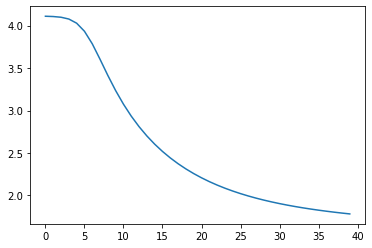

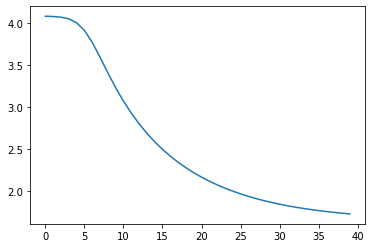

In [37]:
plt.plot(SEloss1)
plt.show()
plt.plot(SEloss2)
plt.show()

## The above two plots are SE loss, train(above) and test(below). learningRate = 1e-3

In [40]:
SEloss1, SEloss2 = my_neuralnet_digits.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

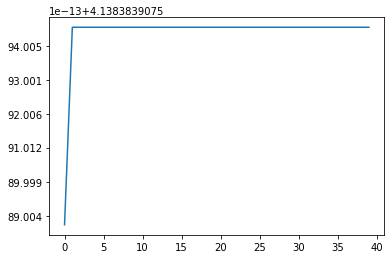

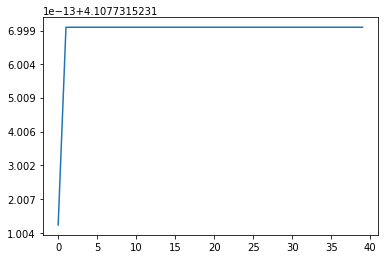

In [41]:
plt.plot(SEloss1)
plt.show()
plt.plot(SEloss2)
plt.show()

## The above two plots are SE loss, train(above) and test(below). learningRate = 1e-1

In [44]:
SEloss1, SEloss2 = my_neuralnet_digits.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

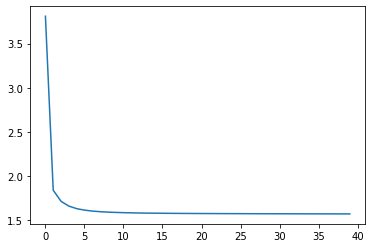

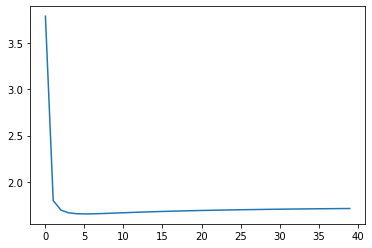

In [45]:
plt.plot(SEloss1)
plt.show()
plt.plot(SEloss2)
plt.show()

## The above two plots are SE loss, train(above) and test(below). learningRate = 1e-2

In [54]:
SEloss1, SEloss2 = my_neuralnet_digits.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

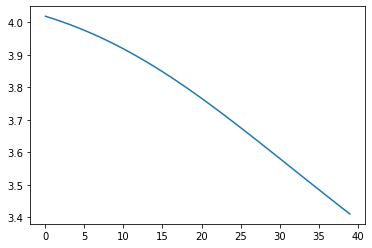

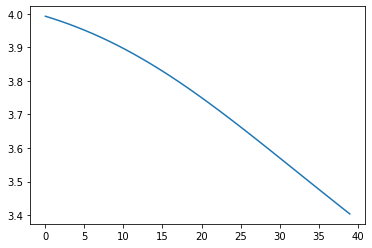

In [55]:
plt.plot(SEloss1)
plt.show()
plt.plot(SEloss2)
plt.show()

## The above two plots are SE loss, train(above) and test(below). learningRate = 1e-4

In [51]:
SEloss1, SEloss2 = my_neuralnet_digits.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

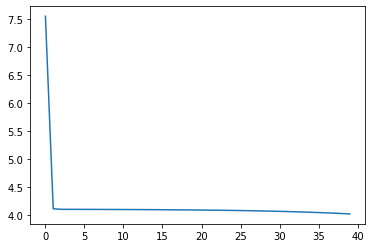

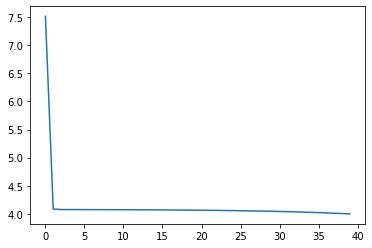

In [52]:
plt.plot(SEloss1)
plt.show()
plt.plot(SEloss2)
plt.show()

## The above two plots are SE loss, train(above) and test(below). learningRate = 1e-5

In [57]:
SEloss1, SEloss2 = my_neuralnet_digits.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

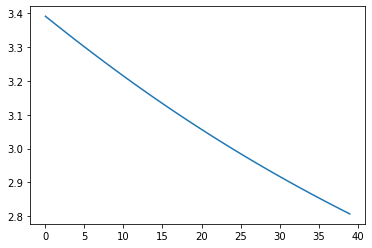

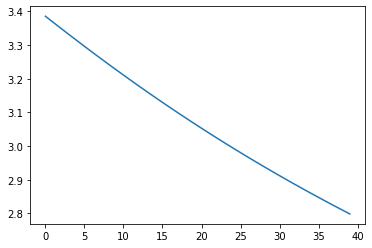

In [59]:
plt.plot(SEloss1)
plt.show()
plt.plot(SEloss2)
plt.show()

## The above two plots are SE loss, train(above) and test(below). learningRate = 1e-6

### As we can see, learning rate 1e-3 gives the best results, as the loss are still decreasing, and with more epochs it will go more down. Also, the performance is good for test set too.

# CE LOSS :-

In [127]:
############### CE LOSS #################

D_in, H1, H2, D_out = 64, 256, 128, 10 #You can add more layers if you wish to 

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sigmoid','sigmoid', 'linear'] #activations in each layer (Note: the input layer does not have any activation)
my_neuralnet_digits_1 = Neural_Network_1(neurons, activation_functions)

In [80]:
CEloss1, CEloss2 = my_neuralnet_digits_1.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

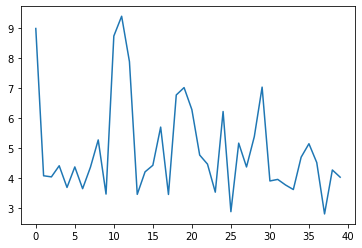

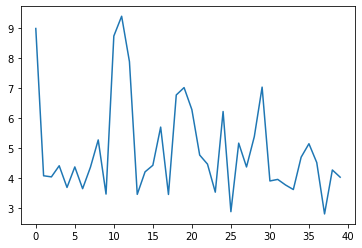

In [81]:
plt.plot(CEloss1)
plt.show()
plt.plot(CEloss2)
plt.show()

## The above two plots are CE loss, train(above) and test(below). learningRate = 1e-1

In [106]:
CEloss1, CEloss2 = my_neuralnet_digits_1.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

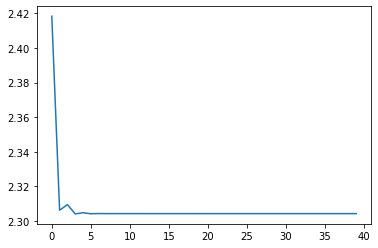

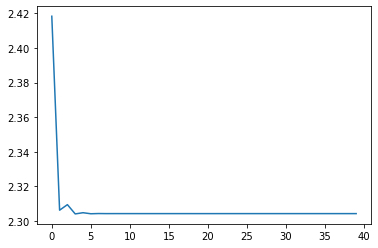

In [107]:
plt.plot(CEloss1)
plt.show()
plt.plot(CEloss2)
plt.show()

## The above two plots are CE loss, train(above) and test(below). learningRate = 1e-2

In [99]:
CEloss1, CEloss2 = my_neuralnet_digits_1.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

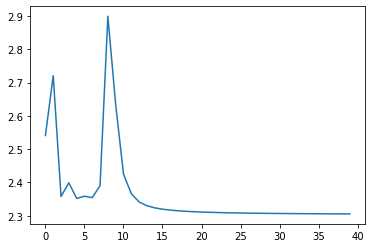

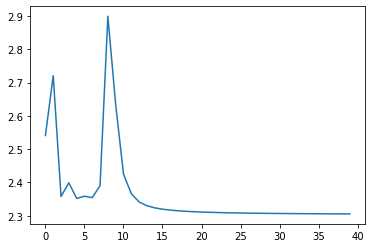

In [100]:
plt.plot(CEloss1)
plt.show()
plt.plot(CEloss2)
plt.show()

## The above two plots are CE loss, train(above) and test(below). learningRate = 1e-3

In [110]:
X_s1 = X_s1 = X_s1/np.linalg.norm(X_s1)
X_s2 = X_s2 = X_s2/np.linalg.norm(X_s2)
CEloss1, CEloss2 = my_neuralnet_digits_1.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

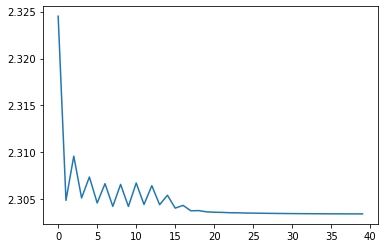

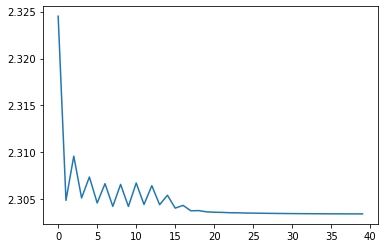

In [111]:
plt.plot(CEloss1)
plt.show()
plt.plot(CEloss2)
plt.show()

## The above two plots are CE loss, train(above) and test(below). learningRate = 1e-4

In [122]:
CEloss1, CEloss2 = my_neuralnet_digits_1.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

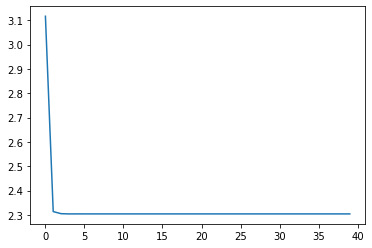

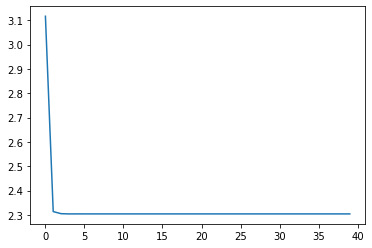

In [125]:
plt.plot(CEloss1)
plt.show()
plt.plot(CEloss2)
plt.show()

## The above two plots are CE loss, train(above) and test(below). learningRate = 1e-5

In [128]:
CEloss1, CEloss2 = my_neuralnet_digits_1.train(X_s1,Y_s1,X_s2,Y_s2,minibatch=True)

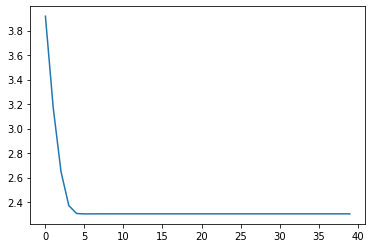

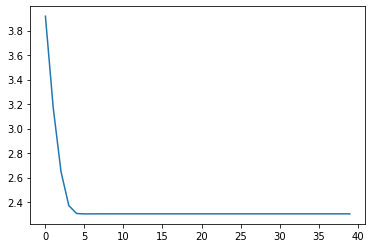

In [129]:
plt.plot(CEloss1)
plt.show()
plt.plot(CEloss2)
plt.show()

## The above two plots are CE loss, train(above) and test(below). learningRate = 1e-6

### The convergence is almost equally good for learning rate 1e-5 and 1e-6, but we will choose lr = 1e-5, as the convergence is faster in that case, for train as well as test sets. But we can choose

## the learning rate for SE is same as before, 1e-3, for CE, we have chosen 1e-5 but we can equally choose 1e-6 too.

## In batch descent, in case of noisy data points, the loss does not reduce for individual datapoints, but on an average. so, theres a possibility, owing to asymptotic convergence, that large batch size would not be advisible

## So, in case of noisy inputs, we might require higher learning rates in batch than stochastic, as the loss would be higher for individual datapoints in that case. But apparently this dataset is nice, thus the learning rates came out to be the same